In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot(x_label, y_label, fill, y=None):
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    line_x = np.linspace(0, 1, 100)
    if fill:
        plt.plot(line_x, y(line_x), lw=3, color='w')
        plt.fill_between(line_x, y(line_x), 1, color='b', alpha=.25)
        plt.fill_between(line_x, y(line_x), 0, color='r', alpha=.25)
    else:
        plt.plot(line_x, y(line_x), lw=3, color='k', alpha=.25)

    plt.xlabel(x_label, size=16)
    plt.ylabel(y_label, size=16)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
def seed():
    np.random.seed(0)

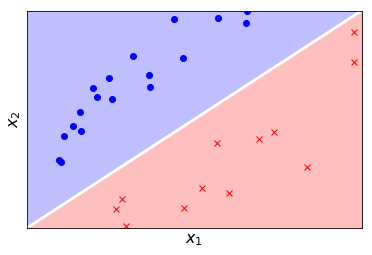

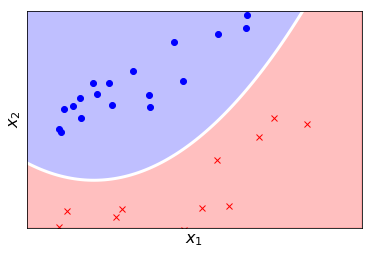

In [51]:
# linear and quadratic boundary

def y(x):
    return x

def y2(x):
    return 2 * x ** 2 - .8 * x + .3

seed();

n_dots = 20

positive_noise = np.random.normal( .3, .1, n_dots)
negative_noise = np.random.normal(-.3, .1, n_dots)
positive_x = np.random.uniform(size=n_dots)
negative_x = np.random.uniform(size=n_dots)

#X1 = np.hstack((positive_x[:, np.newaxis], (y(positive_x) + positive_noise)[:, np.newaxis]))
#X2 = np.hstack((negative_x[:, np.newaxis], (y(negative_x) + negative_noise)[:, np.newaxis]))
#plt.scatter(*zip(*X1), marker='o', color='b')
#plt.scatter(*zip(*X2), marker='x', color='r')

plt.plot(positive_x, y(positive_x) + positive_noise, 'bo')
plt.plot(negative_x, y(negative_x) + negative_noise, 'rx')
plot(r'$x_1$', r'$x_2$', True, y)


#X1 = np.hstack((positive_x[:, np.newaxis], (y2(positive_x) + positive_noise)[:, np.newaxis]))
#X2 = np.hstack((negative_x[:, np.newaxis], (y2(negative_x) + negative_noise)[:, np.newaxis]))
#plt.scatter(*zip(*X1), marker='o', color='b')
#plt.scatter(*zip(*X2), marker='x', color='r')

plt.plot(positive_x, y2(positive_x) + positive_noise, 'bo')
plt.plot(negative_x, y2(negative_x) + negative_noise, 'rx')
plot(r'$x_1$', r'$x_2$', True, y2)

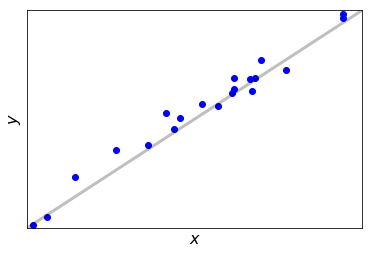

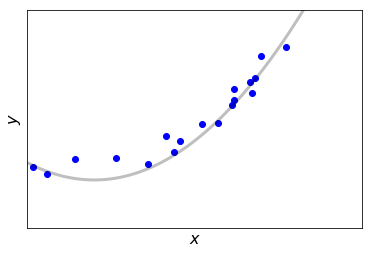

In [4]:
# linear and quadratic regression

def y(x):
    return x

def y2(x):
    return 2 * x ** 2 - .8 * x + .3

seed();

n_dots = 20

noise = np.random.normal(0, .05, n_dots)
x = np.random.uniform(size=n_dots)

plt.plot(x, y(x) + noise, 'bo')
plot(r'$x$', r'$y$', False, y)

plt.plot(x, y2(x) + noise, 'bo')
plot(r'$x$', r'$y$', False, y2)

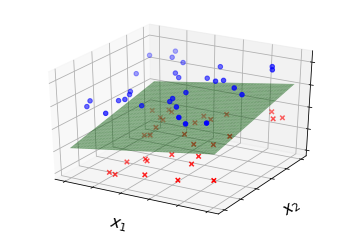

In [3]:
## hyperplane
from mpl_toolkits.mplot3d import Axes3D

def y(x1, x2):
    return x1 + x2 + 0.1

p_noise = np.random.normal(0.3, 0.1, 30)
n_noise = np.random.normal(-0.3, 0.1, 30)
p_x1, p_x2 = np.random.uniform(size=30), np.random.uniform(size=30)
n_x1, n_x2 = np.random.uniform(size=30), np.random.uniform(size=30)

X1 = np.linspace(0, 1, 100)
X2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(X1, X2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, y(X1, X2), color='g', linewidth=0, alpha=0.5)
ax.scatter(p_x1, p_x2, y(p_x1, p_x2) + p_noise + 1, c='b', marker='o')
ax.scatter(n_x1, n_x2, y(n_x1, n_x2) + n_noise - 1, c='r', marker='x')

ax.set_xlabel(r"$x_1$", size=16)
ax.set_ylabel(r"$x_2$", size=16)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

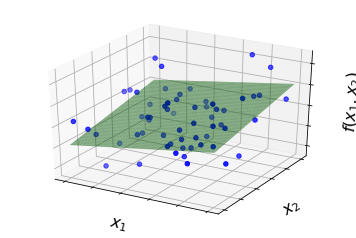

In [9]:
## hyperplane regression
from mpl_toolkits.mplot3d import Axes3D

def y(x1, x2):
    return x1 + x2 + 0.1

noise = np.random.normal(0, 1, 60)

_x1, _x2 = np.random.uniform(size=60), np.random.uniform(size=60)

X1 = np.linspace(0, 1, 100)
X2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(X1, X2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, y(X1, X2), color='g', linewidth=0, alpha=0.5)
ax.scatter(_x1, _x2, y(_x1, _x2) + noise , c='b', marker='o')

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.set_xlabel(r"$x_1$", size=16)
ax.set_ylabel(r"$x_2$", size=16)
ax.set_zlabel(r"$f(x_1, x_2)$", size=16)
plt.show()

In [19]:
## decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import graphviz
import pydotplus

rawdata = np.loadtxt('german_credit.csv', delimiter=',', dtype=str)
feature_names = rawdata[0][1:]
X, y = np.array(rawdata[1:, 1:], dtype=np.float32), np.array(rawdata[1:, 0],np.int32)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names, class_names=['bad', 'good'], filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

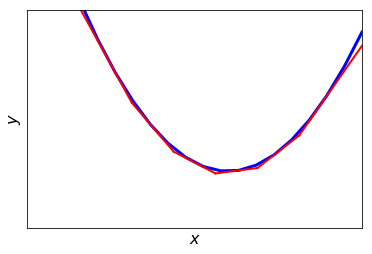

In [6]:
## linear mixture
def y(x):
    return x**2 - 0.4 * x + 0.3
 
plt.xlim(-1, 1)
plt.ylim(0, 1)

X = np.linspace(-1, 1, 20)
plt.plot(X, y(X), lw=3, color='b')

line1_x = np.linspace(-0.75, -0.375, 20)
line1_y = -1.4 * line1_x + 0.05
plt.plot(line1_x, line1_y, lw=2, color='r')

line2_x = np.linspace(-0.375, -0.125, 20)
line2_y = -0.9 * line2_x + 0.2375
plt.plot(line2_x, line2_y, lw=2, color='r')

line3_x = np.linspace(-0.125, 0.125, 20)
line3_y = -0.4 * line3_x + 0.3
plt.plot(line3_x, line3_y, lw=2, color='r')

line4_x = np.linspace(0.125, 0.375, 20)
line4_y = 0.1 * line4_x + 0.2375
plt.plot(line4_x, line4_y, lw=2, color='r')

line5_x = np.linspace(0.375, 0.625, 20)
line5_y = 0.6 * line5_x + 0.05
plt.plot(line5_x, line5_y, lw=2, color='r')

line6_x = np.linspace(0.625, 1, 20)
line6_y = 1.1 * line6_x - 0.2625
plt.plot(line6_x, line6_y, lw=2, color='r')

plt.yticks([])
plt.xticks([])
plt.xlabel(r'$x$', size=16)
plt.ylabel(r'$y$', size=16)
plt.show()

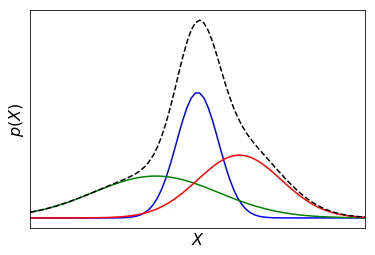

In [5]:
## guassian mixture
from scipy.stats import norm
plt.xlim(-4, 4)

X = np.linspace(-5, 5, 100)
rv1 = norm(loc = 0, scale = .5)
p1 = rv1.pdf(X)
rv2 = norm(loc = -1, scale = 1.5)
p2 = rv2.pdf(X)
rv3 = norm(loc = 1, scale = 1)
p3 = rv3.pdf(X)

p4 = p1 + p2 + p3

plt.plot(X, p1, 'b')
plt.plot(X, p2, 'g')
plt.plot(X, p3, 'r')
plt.plot(X, p4, 'k--')
plt.yticks([])
plt.xticks([])
plt.xlabel(r'$X$', size=16)
plt.ylabel(r'$p(X)$', size=16)
plt.show()

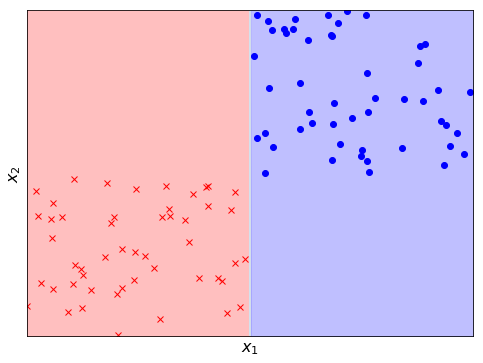

In [58]:
plt.figure(1, figsize=(8, 6))
plt.axvline(x=5)

n_sample = 50
X1 = np.random.random((n_sample, 1)) * 5 + 5
Y1 = np.random.random((n_sample, 1)) * 5 + 5
X2 = np.random.random((n_sample, 1)) * 5
Y2 = np.random.random((n_sample, 1)) * 5

x = np.arange(0, 11, 0.01)
y = np.full(x.shape, 11)

plt.plot(X1, Y1, 'bo')
plt.plot(X2, Y2, 'rx')

plt.axvline(x=5, color='white')
plt.fill_between(x, y, where=x>5, alpha=0.25, interpolate=True, color='b')
plt.fill_between(x, y, where=x<5, alpha=0.25, interpolate=True, color='r')

plt.xlabel(r'$x_1$', size=16)
plt.xticks([])
plt.ylabel(r'$x_2$', size=16)
plt.yticks([])

plt.xlim(0, 10)
plt.ylim(0, 10)

plt.show()

(19, 2) (19,)


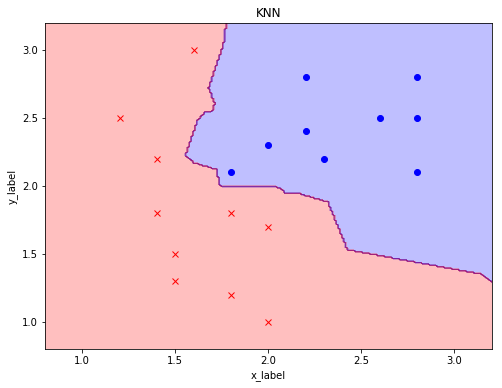

In [79]:
import math
from sklearn.neighbors import KNeighborsClassifier

X1 = np.array([2, 1.8, 1.5, 1.4, 2, 1.8, 1.4, 1.5, 1.2, 1.6])
Y1 = np.array([1.7, 1.8, 1.5, 1.8, 1, 1.2, 2.2, 1.3, 2.5, 3.0])
X2 = np.array([2, 2.3, 2.2, 2.8, 2.8, 2.6, 2.2, 2.8, 1.8])
Y2 = np.array([2.3, 2.2, 2.4, 2.5, 2.1, 2.5, 2.8, 2.8, 2.1])

X = np.array([[2, 1.7], [1.8, 1.8], [1.5, 1.5], [1.4, 1.8], [2, 1], [1.8, 1.2], [1.4, 2.2], [1.5, 1.3], [1.2, 2.5], [1.6, 3.0], [2, 2.3], [2.3, 2.2], [2.2, 2.4], [2.8, 2.5], [2.8, 2.1], [2.6, 2.5], [2.2, 2.8], [2.8, 2.8], [1.8, 2.1]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
print(X.shape, y.shape)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)

x_min, x_max = X1.min() - 3, X1.max() + 3
y_min, y_max = Y1.min() - 3, Y1.max() + 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])



Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.25, colors=('b', 'r'))

# Plot also the training points
plt.plot(X1, Y1, 'rx')
plt.plot(X2, Y2, 'bo')
plt.ylabel("y_label")
plt.xlabel("x_label")

plt.title("KNN")
plt.xlim(0.8, 3.2)
plt.ylim(0.8, 3.2)

plt.show()

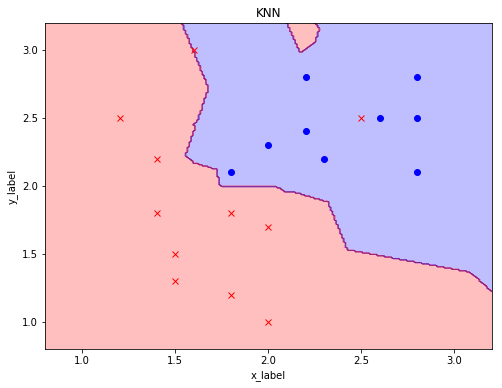

In [80]:


X1 = np.array([2, 1.8, 1.5, 1.4, 2, 1.8, 1.4, 1.5, 1.2, 1.6, 2.5])
Y1 = np.array([1.7, 1.8, 1.5, 1.8, 1, 1.2, 2.2, 1.3, 2.5, 3.0, 2.5])
X2 = np.array([2, 2.3, 2.2, 2.8, 2.8, 2.6, 2.2, 2.8, 1.8])
Y2 = np.array([2.3, 2.2, 2.4, 2.5, 2.1, 2.5, 2.8, 2.8, 2.1])

X = np.array([[2, 1.7], [1.8, 1.8], [1.5, 1.5], [1.4, 1.8], [2, 1], [1.8, 1.2], [1.4, 2.2], [1.5, 1.3], [1.2, 2.5], [1.6, 3.0], [2.5, 2.5], [2, 2.3], [2.3, 2.2], [2.2, 2.4], [3, 2.5], [2.8, 2.7], [2.8, 2.1], [2.6, 2.5], [2.2, 2.8], [1.4, 2.8], [3.0, 2.8], [1.8, 2.1]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1 , -1, -1, -1, -1, -1, -1, -1, -1, -1])
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)

x_min, x_max = X1.min() - 1, X1.max() + 1
y_min, y_max = Y1.min() - 1, Y1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])



Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.25, colors=('b', 'r'))

# Plot also the training points
plt.plot(X1, Y1, 'rx')
plt.plot(X2, Y2, 'bo')
plt.ylabel("y_label")
plt.xlabel("x_label")

plt.title("KNN")
plt.xlim(0.8, 3.2)
plt.ylim(0.8, 3.2)

plt.show()